In [218]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [219]:
df = pd.read_csv("amazon-reviews.csv",sep="\t")
df.columns = ['date', 'summary', 'review', 'rating']
df.head()

,date,summary,review,rating
0,2013-07-16,Awesine,Perfect for new parents. We were able to keep ...,5
1,2013-06-29,Should be required for all new parents!,This book is such a life saver. It has been s...,5
2,2014-03-19,Grandmother watching baby,Helps me know exactly how my babies day has go...,5
3,2013-08-17,repeat buyer,I bought this a few times for my older son and...,5
4,2014-04-01,Great,I wanted an alternative to printing out daily ...,4


In [220]:
df = df[['review', 'rating','date']].reset_index(drop=True)
df.head(10)

,review,rating,date
0,Perfect for new parents. We were able to keep ...,5,2013-07-16
1,This book is such a life saver. It has been s...,5,2013-06-29
2,Helps me know exactly how my babies day has go...,5,2014-03-19
3,I bought this a few times for my older son and...,5,2013-08-17
4,I wanted an alternative to printing out daily ...,4,2014-04-01
5,"This is great for basics, but I wish the space...",4,2014-05-10
6,My 3 month old son spend half of his days with...,5,2013-07-17
7,This book is perfect! I'm a first time new mo...,5,2013-01-27
8,"I wanted to love this, but it was pretty expen...",3,2014-04-22
9,The Baby Tracker brand books are the absolute ...,5,2013-11-19


In [221]:
df.review.isna().sum()

80

In [222]:
df.shape

(205331, 3)

In [223]:
df = df.dropna(subset=['review'])
df.shape

(205251, 3)

In [224]:
def process_reviews(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words).strip()

In [225]:
df['review'] = df['review'].apply(process_reviews)

In [226]:
df.head(10)

,review,rating,date
0,perfect new parents able keep track babys feed...,5,2013-07-16
1,book life saver helpful able go back track tre...,5,2013-06-29
2,helps know exactly babies day gone mother law ...,5,2014-03-19
3,bought times older son bought newborn super ea...,5,2013-08-17
4,wanted alternative printing daily log sheets n...,4,2014-04-01
5,great basics wish space write things bigger lo...,4,2014-05-10
6,3 month old son spend half days mother half ne...,5,2013-07-17
7,book perfect im first time new mom book made e...,5,2013-01-27
8,wanted love pretty expensive months worth cale...,3,2014-04-22
9,baby tracker brand books absolute best tracker...,5,2013-11-19


In [227]:
positive_words = set(open('positive-words.txt').read().split())
#negative_words = set(open('negative-words.txt').read().split())

with open('negative-words.txt', 'r', encoding='ISO-8859-1') as file:
    negative_words = set(file.read().splitlines())


In [228]:
positive_words

{'jubilate',
 'outperform',
 'adventurous',
 'enhanced',
 'elegance',
 'cushy',
 'beautifullly',
 'healthful',
 'panoramic',
 'fascinatingly',
 'intrigue',
 'fortunate',
 'fast-growing',
 'fine',
 'greatest',
 'complementary',
 'wonder',
 'decency',
 'smoothes',
 'decisive',
 'snappy',
 'sane',
 'uphold',
 'adaptable',
 'guiltless',
 'flutter',
 'perseverance',
 'brainiest',
 'clean',
 'ebullient',
 'levity',
 'won',
 'wondrous',
 'wonders',
 'excite',
 'tenacious',
 'jaw-dropping',
 'proactive',
 'enticed',
 'favor',
 'trendy',
 'glistening',
 'guidance',
 'outdone',
 'impressively',
 'outdo',
 'exhilaration',
 'affinity',
 'perfectly',
 'premier',
 'delighted',
 'enough',
 'brisk',
 'privileged',
 'cheapest',
 'sparkling',
 'desiring',
 'useable',
 'achievements',
 'benefits',
 'feisty',
 'respectable',
 'accolade',
 'succeed',
 'empowerment',
 'rock-star',
 'dazzle',
 'amuse',
 'diligence',
 'inexpensive',
 'regally',
 'striking',
 'ardor',
 'whoooa',
 'glisten',
 'thoughtful',
 'hu

In [229]:
negative_words

{'sack',
 'blindingly',
 'lamentably',
 'achey',
 'dirtbags',
 'hardship',
 'venom',
 'defamation',
 'reprehensibly',
 'unsafe',
 'wreaks',
 'spurn',
 'viciously',
 'rant',
 'susceptible',
 'heinous',
 'interruption',
 'disquieting',
 'faint',
 'hubris',
 'acerbically',
 'resent',
 'conspiracy',
 'infuriate',
 'rusts',
 'mania',
 'misbehavior',
 'raping',
 'hazy',
 'disillusions',
 'distrustful',
 'jitters',
 'skinny',
 'annihilation',
 'high-priced',
 'loot',
 'mortifying',
 'sadden',
 'sloppy',
 'dread',
 'tamper',
 'split',
 'overpriced',
 'lazy',
 'plunderer',
 'dense',
 'disgusted',
 'bedlam',
 'slow',
 'mudslinger',
 'direly',
 'kills',
 'archaic',
 'despairing',
 'pertinacious',
 'picket',
 'anxious',
 'aggrieve',
 'dinky',
 'franticly',
 'bleed',
 'hazard',
 'hegemony',
 'despicably',
 'farfetched',
 'ineloquent',
 'pernicious',
 'harried',
 'unprofitable',
 'mistified',
 'unraveled',
 'catastrophically',
 'danger',
 'severe',
 'tumbled',
 'ruining',
 'unnaturally',
 'groundles

In [230]:
def sentiment_score_calculator(review):
    words = review.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)
    sentiment_score = pos_count - neg_count
    return sentiment_score

df['sentiment_score'] = df['review'].apply(sentiment_score_calculator)

def sentiment_type(score):
  if score > 0:
    return 'positive'
  elif score < 0:
    return 'negative'
  else:
    return 'netural'


df['sentiment'] = df['sentiment_score'].apply(lambda score: sentiment_type(score))



In [231]:
df

,review,rating,date,sentiment_score,sentiment
0,perfect new parents able keep track babys feed...,5,2013-07-16,3,positive
1,book life saver helpful able go back track tre...,5,2013-06-29,3,positive
2,helps know exactly babies day gone mother law ...,5,2014-03-19,2,positive
3,bought times older son bought newborn super ea...,5,2013-08-17,8,positive
4,wanted alternative printing daily log sheets n...,4,2014-04-01,3,positive
...,...,...,...,...,...
205326,great expected thank,5,2014-07-20,2,positive
205327,ive thinking trying nanoweb strings bit put hi...,5,2014-07-02,9,positive
205328,tried coated strings past including elixirs ne...,4,2014-07-22,5,positive
205329,well made elixir developed taylor guitars stri...,4,2014-07-01,9,positive


Year: 2001, Number of Reviews: 23
Year: 2002, Number of Reviews: 119
Year: 2003, Number of Reviews: 305
Year: 2004, Number of Reviews: 801
Year: 2005, Number of Reviews: 1874
Year: 2006, Number of Reviews: 1030
Year: 2007, Number of Reviews: 889
Year: 2008, Number of Reviews: 1621
Year: 2009, Number of Reviews: 3277
Year: 2010, Number of Reviews: 8197
Year: 2011, Number of Reviews: 19221
Year: 2012, Number of Reviews: 30205
Year: 2013, Number of Reviews: 69264
Year: 2014, Number of Reviews: 44997
Year: 2015, Number of Reviews: 6893
Year: 2016, Number of Reviews: 7775
Year: 2017, Number of Reviews: 6746
Year: 2018, Number of Reviews: 2014
Average Number of Reviews per Year: 11402.833333333334


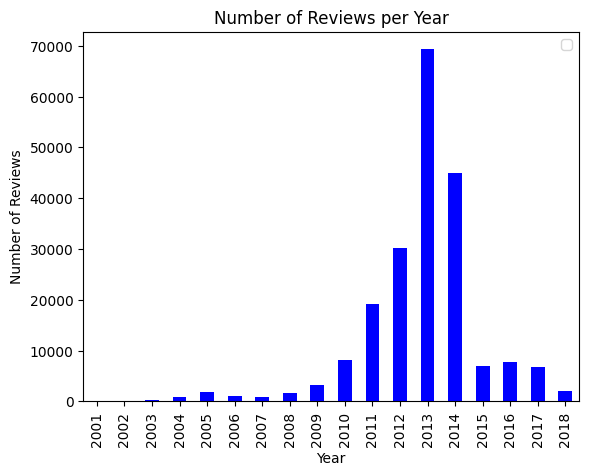

In [232]:
df['year'] = pd.to_datetime(df['date']).dt.year

total_reviews_per_year = df.groupby('year').size()

average_reviews_per_year = total_reviews_per_year.mean()

for year, review_count in total_reviews_per_year.items():
    print(f"Year: {year}, Number of Reviews: {review_count}")
print(f"Average Number of Reviews per Year: {average_reviews_per_year}")

total_reviews_per_year.plot(kind='bar', color='blue')
#plt.axhline(y=average_reviews_per_year, color='red', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.legend()
plt.show()


In [233]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year > 2009]

<ipython-input-234-7552f1402bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-234-7552f1402bb2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['6_month_period'] = df['date'].apply(get_6_month_period)


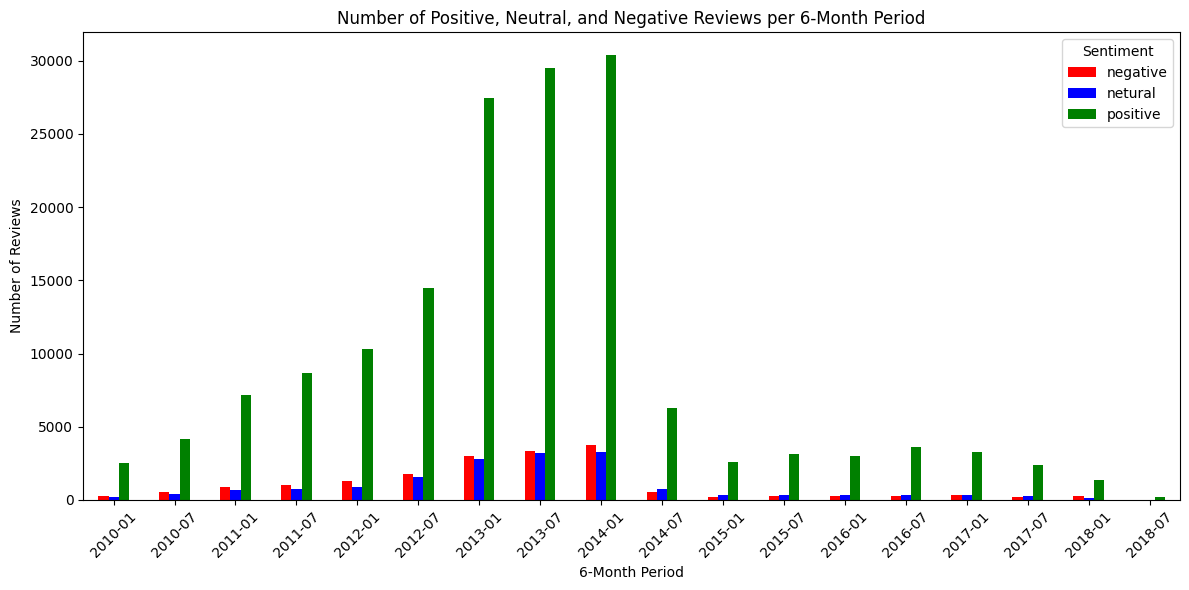

In [234]:
def extract_year(date):
    return pd.to_datetime(date).year
df['date'] = pd.to_datetime(df['date'])

def get_6_month_period(date):
    year = date.year
    month = (date.month - 1) // 6 * 6 + 1
    return pd.Period(year=year, month=month, freq='6M')

df['6_month_period'] = df['date'].apply(get_6_month_period)

sentiment_counts = df.groupby(['6_month_period', 'sentiment']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=False, color=['red', 'blue', 'green'], figsize=(12, 6))

plt.title('Number of Positive, Neutral, and Negative Reviews per 6-Month Period')
plt.xlabel('6-Month Period')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()



<ipython-input-235-4a226c144e97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-235-4a226c144e97>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['6_month_period'] = df['date'].apply(get_6_month_period)


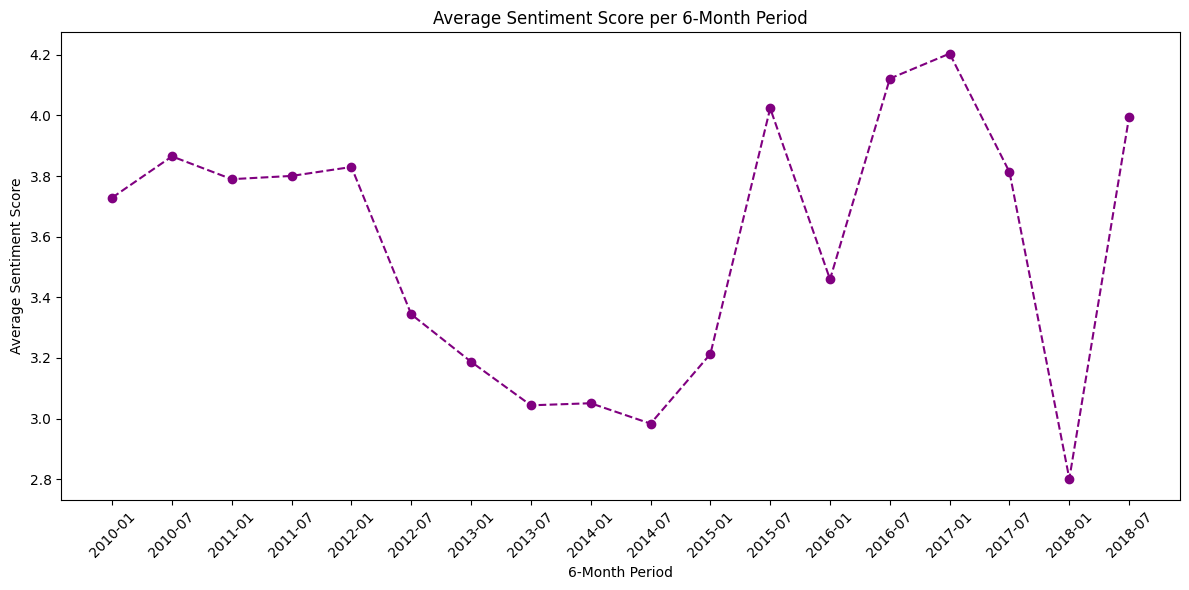

In [235]:
df['date'] = pd.to_datetime(df['date'])

def get_6_month_period(date):
    year = date.year
    month = (date.month - 1) // 6 * 6 + 1
    return pd.Period(year=year, month=month, freq='6M')

df['6_month_period'] = df['date'].apply(get_6_month_period)

avg_sentiment_score = df.groupby('6_month_period')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(avg_sentiment_score.index.astype(str), avg_sentiment_score, color='purple')
plt.plot(avg_sentiment_score.index.astype(str), avg_sentiment_score, color='purple', linestyle='--')

plt.title('Average Sentiment Score per 6-Month Period')
plt.xlabel('6-Month Period')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-236-019b0f98a4bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['date'].dt.to_period('M')


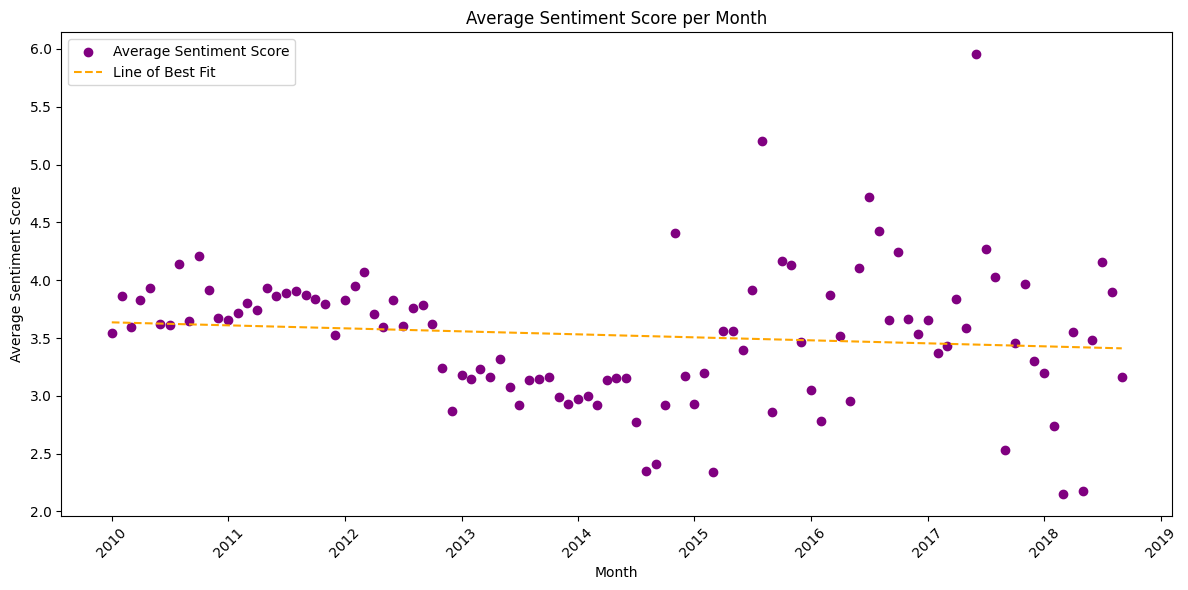

In [236]:

df['year_month'] = df['date'].dt.to_period('M')

avg_sentiment_score = df.groupby('year_month')['sentiment_score'].mean()

avg_sentiment_score.index = avg_sentiment_score.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.scatter(avg_sentiment_score.index, avg_sentiment_score, color='purple', label='Average Sentiment Score')

x = np.arange(len(avg_sentiment_score))
z = np.polyfit(x, avg_sentiment_score, 1)
p = np.poly1d(z)

plt.plot(avg_sentiment_score.index, p(x), color='orange', linestyle='--', label='Line of Best Fit')

plt.title('Average Sentiment Score per Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-237-02097e7fce4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


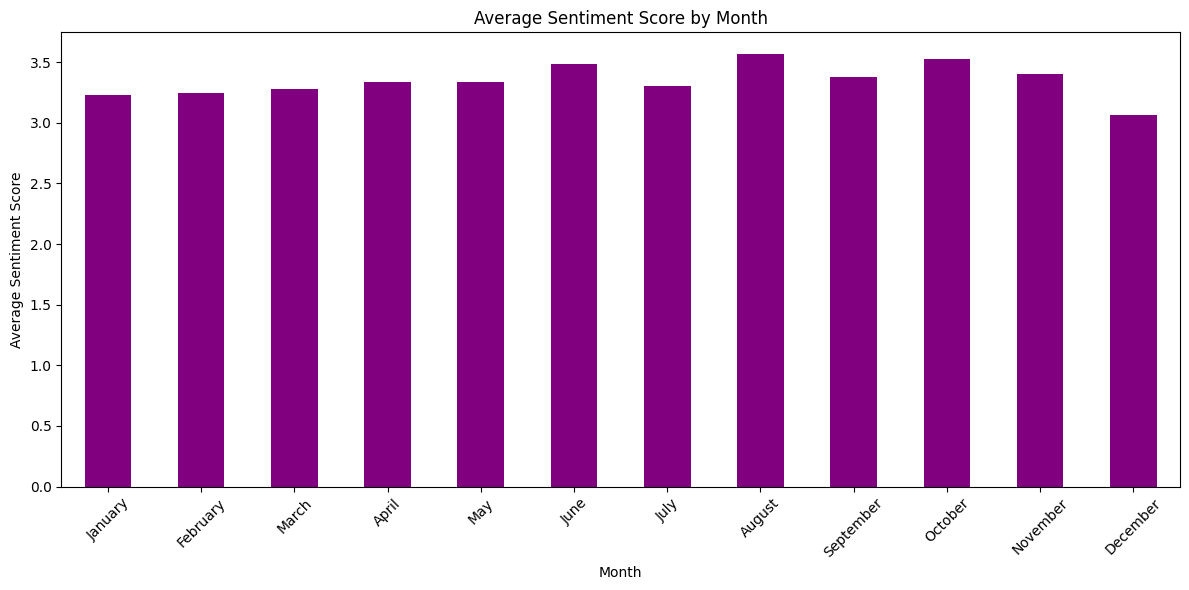

In [237]:

df['month'] = df['date'].dt.month

avg_sentiment_score_by_month = df.groupby('month')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
avg_sentiment_score_by_month.plot(kind='bar', color='purple')

plt.title('Average Sentiment Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.tight_layout()

plt.show()

In [238]:
average_sentiment_score = df['sentiment_score'].mean()
print("Average Sentiment Score:", average_sentiment_score)

Average Sentiment Score: 3.3363848611452447


In [239]:
df = df.sort_values('sentiment_score', ascending=False).reset_index(drop=True)
print("Here are the reviews with the highest 10 sentiment scores!")
df[:10]

Here are the reviews with the highest 10 sentiment scores!


,review,rating,date,sentiment_score,sentiment,year,6_month_period,year_month,month
0,see update written spectra released s1 spectra...,4,2013-03-30,86,positive,2013,2013-01,2013-03,3
1,let start saying really like device number rea...,4,2015-07-29,81,positive,2015,2015-07,2015-07,7
2,let start saying really like device number rea...,4,2015-07-29,81,positive,2015,2015-07,2015-07,7
3,loreal dermablend professional line cosmetics ...,5,2017-07-03,73,positive,2017,2017-07,2017-07,7
4,loreal dermablend professional line cosmetics ...,5,2017-07-03,73,positive,2017,2017-07,2017-07,7
5,loreal dermablend professional line cosmetics ...,5,2017-07-03,73,positive,2017,2017-07,2017-07,7
6,loreal dermablend professional line cosmetics ...,5,2017-07-03,73,positive,2017,2017-07,2017-07,7
7,constructionthis amp certainly looks sharp nea...,5,2011-02-10,72,positive,2011,2011-01,2011-02,2
8,warning depth review want quick summary see bo...,4,2016-07-11,71,positive,2016,2016-07,2016-07,7
9,ive using bready year half love always getting...,5,2014-04-14,67,positive,2014,2014-01,2014-04,4


In [240]:
print("Here are the reviews with the lowest 10 sentiment scores:")
df[-10:]

Here are the reviews with the lowest 10 sentiment scores:


,review,rating,date,sentiment_score,sentiment,year,6_month_period,year_month,month
195302,given tripp trapp chair gift sadly bought tihs...,1,2011-03-26,-17,negative,2011,2011-01,2011-03,3
195303,rating 35 4i already britax bagile stroller li...,4,2013-10-05,-17,negative,2013,2013-07,2013-10,10
195304,researched lot monitors like humidifiers doesn...,1,2012-01-06,-18,negative,2012,2012-01,2012-01,1
195305,purchased orbit infant stroller system year ha...,1,2010-08-24,-19,negative,2010,2010-07,2010-08,8
195306,one cases cheaper betteri always read reviews ...,1,2011-12-27,-19,negative,2011,2011-07,2011-12,12
195307,ten stars yes problem product gets 10 stars fi...,5,2015-12-09,-19,negative,2015,2015-07,2015-12,12
195308,bassinet overpriced ridiculous could would eit...,2,2011-01-15,-21,negative,2011,2011-01,2011-01,1
195309,update review later wanted post case anyone is...,4,2012-10-19,-21,negative,2012,2012-07,2012-10,10
195310,downgrade 1o star returning back brookmays sel...,1,2012-01-03,-23,negative,2012,2012-01,2012-01,1
195311,pros1 sensitive microphone hear baby breathing...,5,2013-12-08,-26,negative,2013,2013-07,2013-12,12


In [241]:
negative_data = df[df['sentiment'] == 'negative']

average_rating_negative_mean = negative_data['rating'].mean()
average_sentiment_score = negative_data['sentiment_score'].mean()
average_rating_negative_std = negative_data['rating'].std()

print("Total number of negative sentiments: ", len(negative_data))
print("The average rating for a review that has negative sentiment is: ", average_rating_negative_mean)
print("The average sentiment score for a review that has a negative sentiment is: ", average_sentiment_score)
print("The standard deviation rating for a review that has negative sentiment is: ", average_rating_negative_std)

Total number of negative sentiments:  18176
The average rating for a review that has negative sentiment is:  3.2994608274647885
The average sentiment score for a review that has a negative sentiment is:  -2.106899207746479
The standard deviation rating for a review that has negative sentiment is:  1.4976374740361458


In [242]:
positive_data = df[df['sentiment'] == 'positive']

average_rating_positive_mean = positive_data['rating'].mean()
average_sentiment_score = positive_data['sentiment_score'].mean()
average_rating_positive_std = positive_data['rating'].std()
print("Total number of positive sentiments: ", len(positive_data))
print("The average rating for a review that has positive sentiment is: ", average_rating_positive_mean)
print("The average sentiment score for a review that has a positive sentiment is: ", average_sentiment_score)

print("The standard deviation rating for a review that has positive sentiment is: ", average_rating_positive_std)

Total number of positive sentiments:  160474
The average rating for a review that has positive sentiment is:  4.395808666824532
The average sentiment score for a review that has a positive sentiment is:  4.299331979012177
The standard deviation rating for a review that has positive sentiment is:  0.9610526378067489
